In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

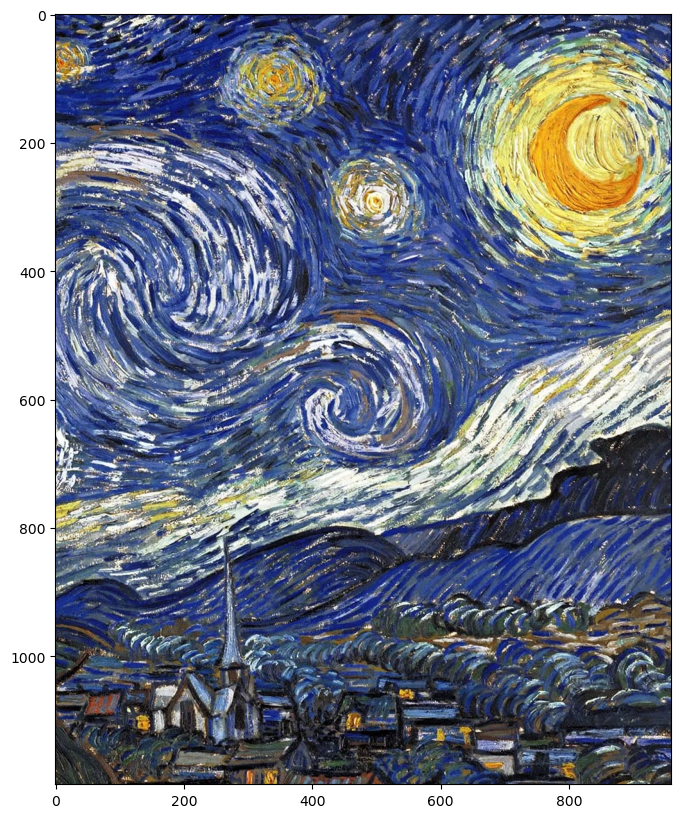

In [4]:
image = cv2.imread('./images/starry_night.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

device = 'cuda'
# desired size of the output image
imsize = 650 if torch.cuda.is_available() else 128  # use small size if no GPU

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

content_img = image_loader("./images/coco.jpg")
converted_img = transforms.ToPILImage(content_img)
c = Image.open("./images/coco.jpg").convert('RGB')
np.array(c) 
content_img

tensor([[[[0.9137, 0.9137, 0.9176,  ..., 0.7294, 0.7373, 0.7373],
          [0.9137, 0.9098, 0.9176,  ..., 0.7333, 0.7373, 0.7373],
          [0.9137, 0.9098, 0.9176,  ..., 0.7333, 0.7373, 0.7373],
          ...,
          [0.7412, 0.7333, 0.7098,  ..., 0.7961, 0.7922, 0.7882],
          [0.7529, 0.7686, 0.7843,  ..., 0.8275, 0.8196, 0.8196],
          [0.7843, 0.7922, 0.8039,  ..., 0.8196, 0.8196, 0.8196]],

         [[0.8745, 0.8745, 0.8667,  ..., 0.6588, 0.6667, 0.6667],
          [0.8745, 0.8706, 0.8667,  ..., 0.6627, 0.6667, 0.6667],
          [0.8745, 0.8706, 0.8667,  ..., 0.6627, 0.6667, 0.6667],
          ...,
          [0.5373, 0.5294, 0.5059,  ..., 0.6039, 0.6000, 0.5961],
          [0.5490, 0.5647, 0.5804,  ..., 0.6353, 0.6275, 0.6275],
          [0.5804, 0.5882, 0.6000,  ..., 0.6275, 0.6275, 0.6275]],

         [[0.8353, 0.8353, 0.8314,  ..., 0.5647, 0.5725, 0.5725],
          [0.8353, 0.8314, 0.8314,  ..., 0.5686, 0.5725, 0.5725],
          [0.8353, 0.8314, 0.8314,  ..., 0

In [11]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

# device = "cuda"
device = 'cpu'
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

In [12]:
predictor.set_image(image)


In [13]:
input_point = np.array([[300, 200]])
input_label = np.array([1])

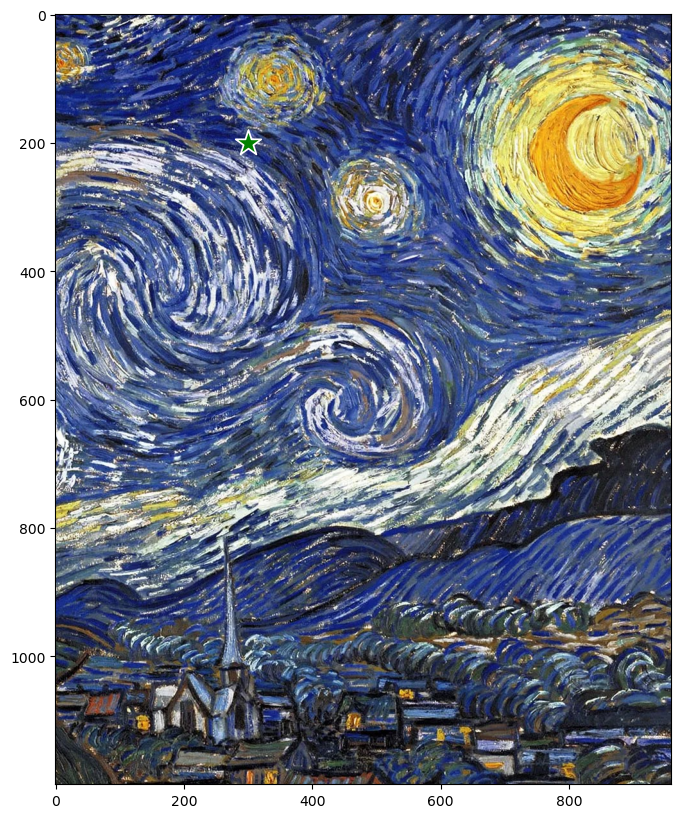

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [15]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [16]:
masks.shape  # (number_of_masks) x H x W

(3, 1200, 960)

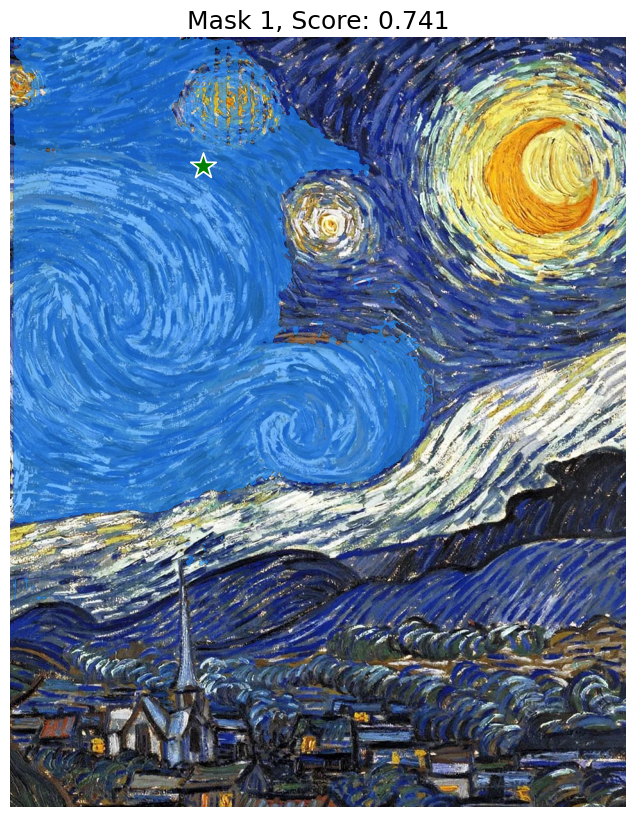

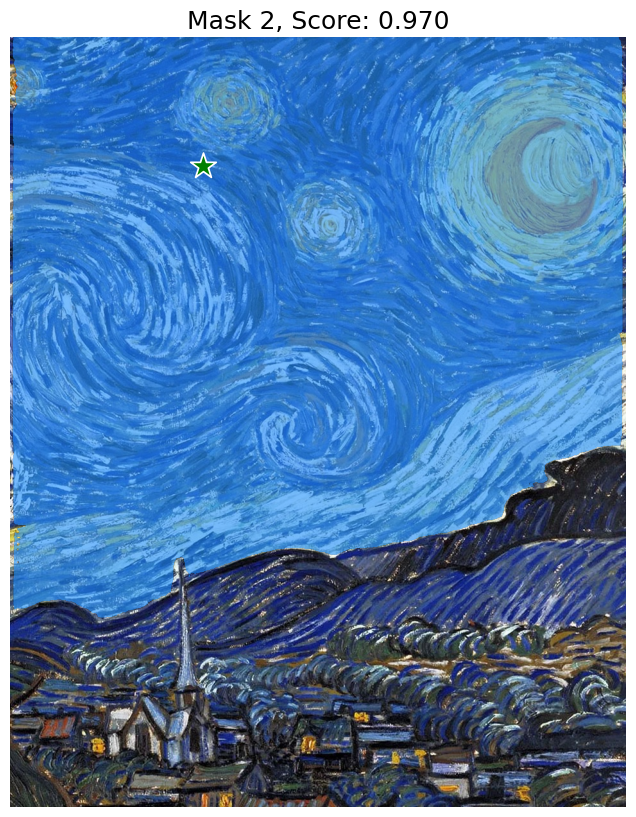

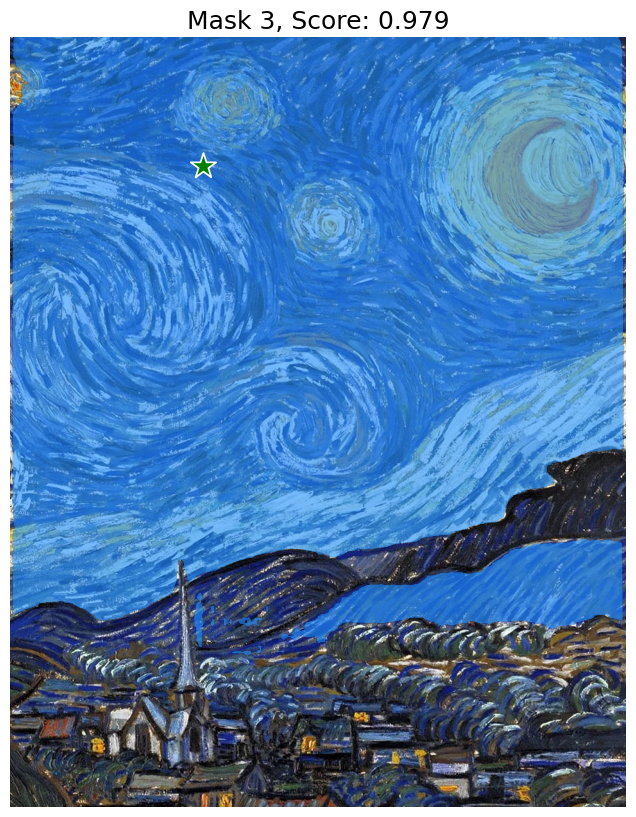

In [17]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  

In [12]:
image

array([[[233, 223, 213],
        [233, 223, 213],
        [234, 221, 212],
        ...,
        [186, 168, 144],
        [188, 170, 146],
        [188, 170, 146]],

       [[233, 223, 213],
        [232, 222, 212],
        [234, 221, 212],
        ...,
        [187, 169, 145],
        [188, 170, 146],
        [188, 170, 146]],

       [[233, 223, 213],
        [232, 222, 212],
        [234, 221, 212],
        ...,
        [187, 169, 145],
        [188, 170, 146],
        [188, 170, 146]],

       ...,

       [[189, 137,  77],
        [187, 135,  75],
        [181, 129,  69],
        ...,
        [203, 154,  85],
        [202, 153,  84],
        [201, 152,  83]],

       [[192, 140,  80],
        [196, 144,  84],
        [200, 148,  88],
        ...,
        [211, 162,  93],
        [209, 160,  91],
        [209, 160,  91]],

       [[200, 148,  88],
        [202, 150,  90],
        [205, 153,  93],
        ...,
        [209, 160,  91],
        [209, 160,  91],
        [209, 160,  91]]